In [10]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

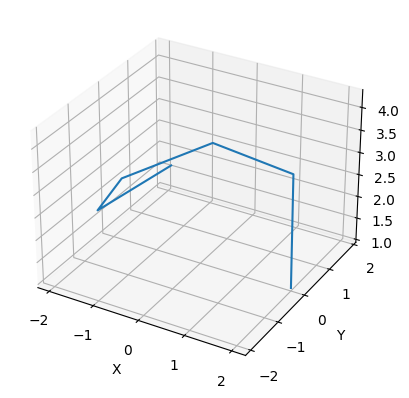

In [11]:
#2a)
pos = np.array([[2, 0, 1],
       [1.08, 1.68, 2.38],
       [-0.83, 1.82, 2.49],
       [-1.97, 0.28, 2.15],
       [-1.31, -1.51, 2.59],
       [0.57, -1.91, 4.32]])

# Extract x, y, z coordinates from the list of points
x = [p[0] for p in pos]
y = [p[1] for p in pos]
z = [p[2] for p in pos]

# Plot the path connecting the points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

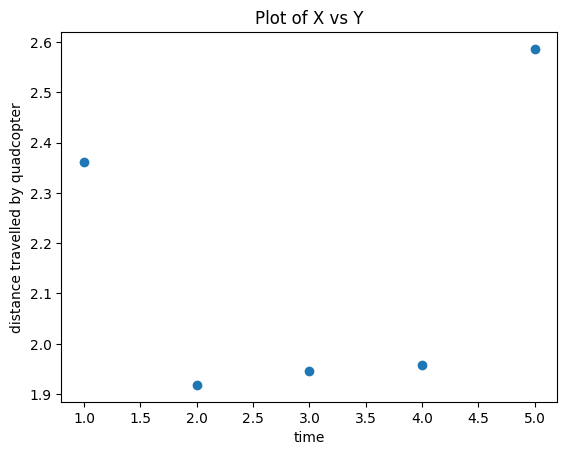

In [12]:
# Calculate the pairwise distances between the points

dist = np.array([])
for j in range(0,len(pos)-1):
       i = pos[j]
       i2 = pos[j+1]
       d = np.sqrt((i2[0]-i[0])**2+(i2[1]-i[1])**2+(i2[2]-i[2])**2)
       dist = np.append(dist,d)

np.sum(dist)/5

y = dist
x = [1,2,3,4,5]
# Plot the x and y values
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('time')
plt.ylabel('distance travelled by quadcopter')
plt.title('Plot of X vs Y')

# Show the plot
plt.show()



(5, 1)
2.153775242064728
the error is  0.36666103334512085


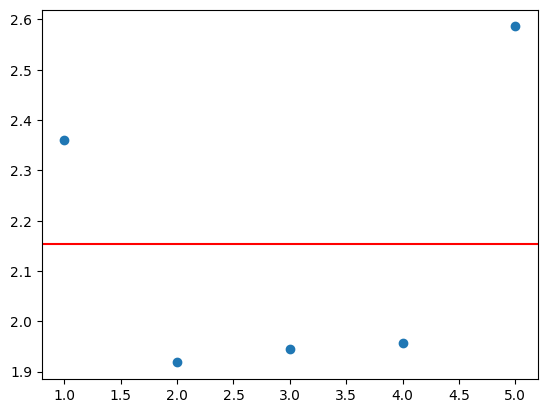

In [13]:
Y = dist.transpose()
Y = Y.reshape(-1, 1)
X = np.array([1, 1, 1, 1, 1]).reshape(-1, 1)
print(np.shape(X))
X.transpose()
# XtX1 = np.linalg.inv(np.matmul(X.transpose(),(X)))
# XtX1X= np.matmul(XtX1,X.transpose())
# print(XtX1X*Y)
B = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(),(X))),X.transpose()),Y)
# B = np.linalg.inv(X.transpose().dot(X))*X.transpose()*Y
# print(B)
plt.scatter(x, y)
print(B[0][0])
plt.axhline(y = B[0][0], color = 'r', linestyle = '-')
E = np.sum(np.power(Y-B[0][0],2))
print("the error is ", E)
plt.show()

In [14]:
B = np.sum(y)/len(y) #start val B
E = np.sum(((Y-B)**2))
B = B + 0.5

the error is  1.9533741440642116
the most likely distance travelled by the quadcopter in the next second will be: [2.30078686]


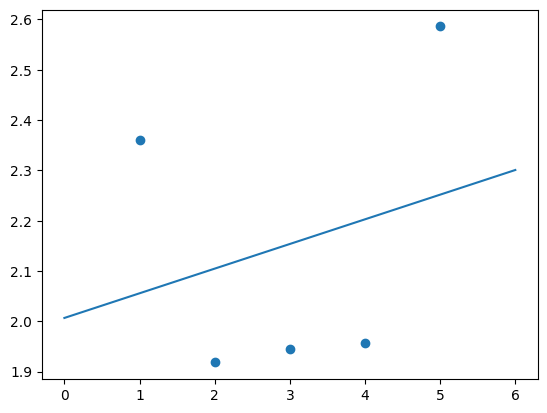

In [15]:
Y = dist.transpose()
Y = Y.reshape(-1, 1)
X = np.array([[1, 1, 1, 1, 1],[1,2,3,4,5]]).transpose()
X.transpose()
# XtX1 = np.linalg.inv(np.matmul(X.transpose(),(X)))
# XtX1X= np.matmul(XtX1,X.transpose())
# print(XtX1X*Y)
B = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(),(X))),X.transpose()),Y)
# B = np.linalg.inv(X.transpose().dot(X))*X.transpose()*Y
# print(B)
E = np.sum(np.power(Y-(B[0]+B[1]*x),2))
print("the error is ", E)
plt.scatter(x, y)
xx = [0 ,1,2,3,4,5,6]
plt.plot(B[0]+B[1]*xx)
print("the most likely distance travelled by the quadcopter in the next second will be:", B[0]+B[1]*6)

In [16]:
Ydiff = np.array([np.array(pos[1])- np.array(pos[0]), np.array(pos[2])- np.array(pos[1]), np.array(pos[3])- np.array(pos[2]), np.array(pos[4])- np.array(pos[3]), np.array(pos[5])- np.array(pos[4])])
X = np.array([[1,1,1,1,1],[1,2,3,4,5]]).transpose()
B = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(),(X))),X.transpose()),Ydiff)
B
# Y = dist.transpose()
# Y = Y.reshape(-1, 1)
# X = np.array([[1, 1, 1, 1, 1],[1,2,3,4,5]]).transpose()
# X.transpose()
# B = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(),(X))),X.transpose()),Y)
# E = np.sum(np.power(Y-(B[0]+B[1]*x),2))
# print("the error is ", E)
# plt.scatter(x, y)
# xx = [0 ,1,2,3,4,5,6]
# plt.plot(B[0]+B[1]*xx)

array([[-2.737,  1.445,  0.355],
       [ 0.817, -0.609,  0.103]])

In [17]:
# gradient descent
import numpy as np

def gradient_descent(start, function, gradient, learn_rate, max_iter, tol=0.001):
  x = start
  for it in range(max_iter):
    diff = learn_rate*gradient(x)
    if np.abs(diff) < tol:
      break
    print("iteration =", it, "\t\tx =", "{:.5f}".format(x), "\t\tf(x) =", "{:.3f}".format(function(x)))
    x = x - diff

# a simple function f(x) = x^2 - 4x + 1
def func(x):
  return x**2-4*x+1

# the gradient of the function
def gradient_func(x):
  return 2*x - 4


gradient_descent(9, func, gradient_func, 0.1, 100)


iteration = 0 		x = 9.00000 		f(x) = 46.000
iteration = 1 		x = 7.60000 		f(x) = 28.360
iteration = 2 		x = 6.48000 		f(x) = 17.070
iteration = 3 		x = 5.58400 		f(x) = 9.845
iteration = 4 		x = 4.86720 		f(x) = 5.221
iteration = 5 		x = 4.29376 		f(x) = 2.261
iteration = 6 		x = 3.83501 		f(x) = 0.367
iteration = 7 		x = 3.46801 		f(x) = -0.845
iteration = 8 		x = 3.17441 		f(x) = -1.621
iteration = 9 		x = 2.93952 		f(x) = -2.117
iteration = 10 		x = 2.75162 		f(x) = -2.435
iteration = 11 		x = 2.60130 		f(x) = -2.638
iteration = 12 		x = 2.48104 		f(x) = -2.769
iteration = 13 		x = 2.38483 		f(x) = -2.852
iteration = 14 		x = 2.30786 		f(x) = -2.905
iteration = 15 		x = 2.24629 		f(x) = -2.939
iteration = 16 		x = 2.19703 		f(x) = -2.961
iteration = 17 		x = 2.15763 		f(x) = -2.975
iteration = 18 		x = 2.12610 		f(x) = -2.984
iteration = 19 		x = 2.10088 		f(x) = -2.990
iteration = 20 		x = 2.08070 		f(x) = -2.993
iteration = 21 		x = 2.06456 		f(x) = -2.996
iteration = 22 		x = 2.0

In [18]:
# 2C
np.array([2, 0])- np.array([1.08, 1.68])


array([ 0.92, -1.68])